# Step 8: Burgers' Equation in 2D

PDE's:
$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

Discretize:
$$
\begin{split}
& \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

Re-arrange for unknown components of $u$ and $v$:
$$
\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$
$$
\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}
$$

In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [38]:
### variable declarations
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu

x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)

u = numpy.ones((ny,nx))
v = numpy.ones((ny,nx))
un = numpy.ones((ny,nx))
vn = numpy.ones((ny,nx))
comb = numpy.ones((ny,nx))

### Assign hat function initial conditions
u[int(0.5/dy):int(1/dy+1) , int(0.5/dx):int(1/dx+1)] = 2
v[int(0.5/dy):int(1/dy+1) , int(0.5/dx):int(1/dx+1)] = 2

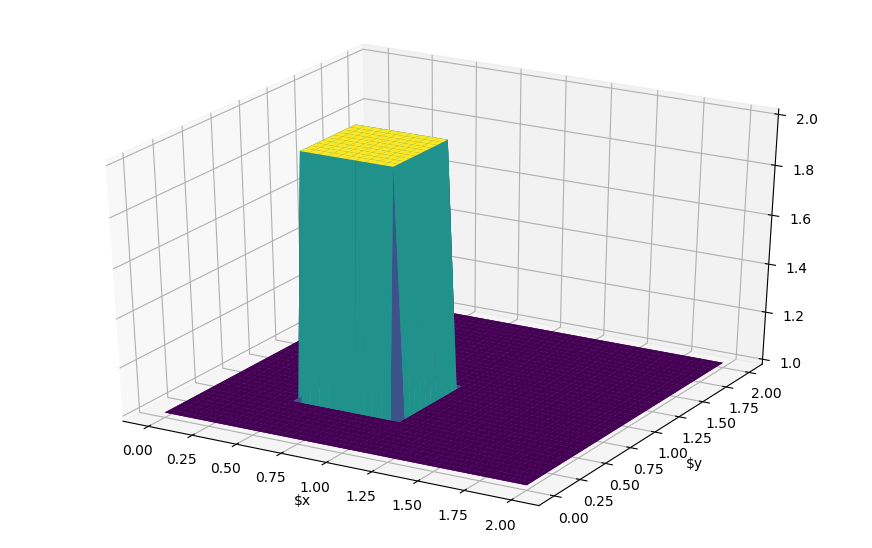

In [34]:
### plot I.Cs
fig = pyplot.figure(figsize=(11,7),dpi=100)
ax = fig.gca(projection='3d')
X,Y = numpy.meshgrid(x,y)
ax.plot_surface(X,Y, u[:], cmap=cm.viridis,rstride=1,cstride=1)
ax.plot_surface(X,Y, v[:], cmap=cm.viridis,rstride=1,cstride=1)
ax.set_xlabel('$x')
ax.set_ylabel('$y');

In [57]:
def burgers(nt):
    ### Assign hat function initial conditions
   
    u = numpy.ones((ny,nx))
    v = numpy.ones((ny,nx)) 
    un = numpy.ones((ny,nx))
    vn = numpy.ones((ny,nx))
    u[int(0.5/dy):int(1/dy+1) , int(0.5/dx):int(1/dx+1)] = 2
    v[int(0.5/dy):int(1/dy+1) , int(0.5/dx):int(1/dx+1)] = 2
    
    for n in range(nt + 1): ##loop across number of time steps
        un = u.copy()
        vn = v.copy()

        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                         dt / dx * un[1:-1, 1:-1] * 
                         (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                         dt / dy * vn[1:-1, 1:-1] * 
                         (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                         nu * dt / dx**2 * 
                         (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                         nu * dt / dy**2 * 
                         (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))

        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                         dt / dx * un[1:-1, 1:-1] *
                         (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                         dt / dy * vn[1:-1, 1:-1] * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                         nu * dt / dx**2 * 
                         (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                         nu * dt / dy**2 *
                         (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))

        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
        
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
    ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

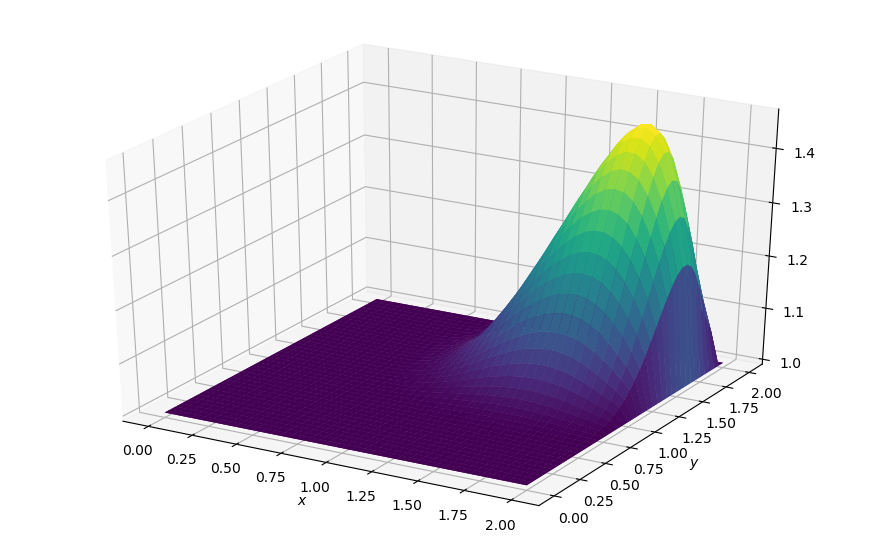

In [62]:
burgers(3000)